<a href="https://colab.research.google.com/github/ymuto0302/ML/blob/main/MachineLearning_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sklearn を用いた分類実験：cross validation
データセットからランダム，かつ独立に学習データ，テストデータを切り出した結果，試行毎に
- 学習データ，テストデータの中身が異なる
- その結果，正解率が異なる。

この問題を解消する手法が cross validation (交差検証) である。

目的：
- cross validation の必要性を理解する。
- モデル間の比較を行う場合，検定を用いた定量的な評価が必要であることを知る。

sklearn における cross validation の説明：  
https://scikit-learn.org/stable/modules/cross_validation.html

---
## 対象：wine データセット
- サンプル数：178個
- 次元数：13次元
- クラス：0〜2 の 3クラス

sklearn.datasets.load_wine() のマニュアル：  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

---
## SVC を分類器として cross validation を試す


In [3]:
# wine データセットの読み込み
from sklearn.datasets import load_wine
dataset = load_wine()

# 全データに別名をつける
X = dataset.data
y = dataset.target

# Support Vector Classification (kernel: rbf)
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# モデルの定義
model = SVC(kernel='rbf') # モデルの定義

# 5-fold Cross Validation による正解率
scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
print("scores: {}".format(scores))

# ５個のスコアから平均と標準偏差を求める
import numpy as np
print("accuracy: mean={}, standard deviation={}".format(np.mean(scores), np.std(scores)))

scores: [0.63888889 0.61111111 0.63888889 0.68571429 0.74285714]
accuracy: mean=0.6634920634920635, standard deviation=0.04636170738133653


上記で，平均(mean)と標準偏差(standard deviation)を求める目的は何か？

答えは，次のとおり：
- 分類器のもつ本来の性能（正解率）を評価すること
- 分類器の学習がどの程度，データに依存するかを知ること
- 複数の分類器を比較する際，性能に差があるかを**大まかに**判断すること

(注意) ２つの分類器(例えば SVC と Random Forest)の分類性能を比較したい場合，厳密には
平均値の差の検定(2標本のｔ検定；２つの分布で分散が異なる場合)を用いる。

(参考)  
http://www.aoni.waseda.jp/abek/document/t-test.html#:~:text=%E6%A8%99%E6%9C%AC%E3%81%8B%E3%82%89%E5%BE%97%E3%82%89%E3%82%8C%E3%81%9F,%E3%81%A6%E3%82%88%E3%81%84%E3%81%8B%EF%BC%8C%E3%81%A8%E3%81%84%E3%81%86%E6%A4%9C%E5%AE%9A%EF%BC%8E


---
## 複数の分類器で cross validation を行い，結果を可視化する

SVC (kerne:rbf): mean=0.6634920634920635, std=0.04636170738133653
SVC (kernel:linear): mean=0.961111111111111, std=0.041573970964154924
DecisionTree: mean=0.882063492063492, std=0.05936932333527122
KNeighbors: mean=0.6912698412698413, std=0.04877951071049148
RandomForest: mean=0.9722222222222221, std=0.024845199749997673
GaussianNB: mean=0.9663492063492063, std=0.02113317858457236


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Multi-Layer Perceptron: mean=0.6144444444444443, std=0.24393288049987127


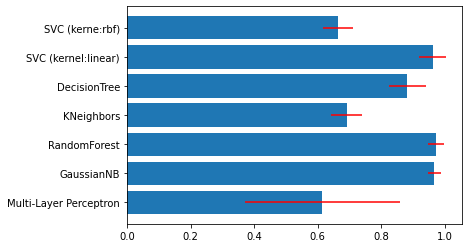

In [4]:
'''
iris dataset に対する分類性能の比較
'''
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# wine データセットの読み込み
from sklearn.datasets import load_wine
dataset = load_wine()

X = dataset.data
y = dataset.target

# モデルのリスト化
# リスト生成にあたり，(モデル名, モデルのコンストラクタ) というタプル形式で与えている。
# → 実行結果を評価する際，楽になるように。
models = []
models.append(("SVC (kerne:rbf)", SVC(kernel='rbf')))
models.append(("SVC (kernel:linear)", SVC(kernel='linear')))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("KNeighbors", KNeighborsClassifier()))
models.append(("RandomForest", RandomForestClassifier()))
models.append(("GaussianNB", GaussianNB()))
# models.append(("LogisticRegression", LogisticRegression()))
models.append(("Multi-Layer Perceptron", MLPClassifier()))

classifier_names = [] # モデル名を保存するためのリスト
means = [] # 正解率の平均を保存するためのリスト
errors = [] # 正解率の標準偏差を保存するためのリスト
scores_list = []

# 個々のモデルで分類する
import numpy as np
from sklearn.model_selection import cross_val_score
for model_name, model in models:
    # 5-fold CV による正解率
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
    # print(scores)

    acc_mean = np.mean(scores)
    acc_std = np.std(scores)
    print("{}: mean={}, std={}".format(model_name, acc_mean, acc_std))

    # 分類結果（正解率）の保存
    classifier_names.append(model_name)
    means.append(acc_mean)
    errors.append(acc_std)
    scores_list.append(scores)

# 可視化
import matplotlib.pyplot as plt
plt.barh(classifier_names, means, xerr=errors, ecolor='red') # 横向き棒グラフ (horizontal bar char)
plt.gca().invert_yaxis() # y軸を逆向きにする

'''
# (参考) https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
plt.boxplot(scores_list, labels=classifier_names, showmeans=True, vert=False)
plt.gca().invert_yaxis() # y軸を逆向きにする
'''

plt.show()

---
(メモ) cross_val_score() の scoring に指定できる値 (主な値のみ)：
- 'accuracy' : 正解率 (metrics.accuracy_score)
- 'precision' : 精度 (metrics.precision_score suffixes apply as with 'f1')
- 'recall' : 再現率 (metrics.recall_score suffixes apply as with 'f1')
- 'f1' : F1 スコア (metrics.f1_score for binary targets)
- 'roc_auc' : Area Under the Receiver Operating Characteristic Curve (metrics.roc_auc_score)
- 'f1_micro' : マイクロ F1 スコア (metrics.f1_score micro-averaged)
- 'f1_macro' : マクロ F1 スコア (metrics.f1_score macro-averaged)

---
## Wilcoxon signed-rank test を用いて，分類器の性能を比較する

In [2]:
'''
wine dataset に対する分類性能の比較
'''
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# wine データセットの読み込み
from sklearn.datasets import load_wine
dataset = load_wine()

X = dataset.data
y = dataset.target

# モデルのリスト化
# リスト生成にあたり，(モデル名, モデルのコンストラクタ) というタプル形式で与えている。
# → 実行結果を評価する際，楽になるように。
models = []
models.append(("SVC (kerne:rbf)", SVC(kernel='rbf')))
models.append(("SVC (kernel:linear)", SVC(kernel='linear')))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("KNeighbors", KNeighborsClassifier()))
models.append(("RandomForest", RandomForestClassifier()))
models.append(("GaussianNB", GaussianNB()))
# models.append(("LogisticRegression", LogisticRegression()))
models.append(("Multi-Layer Perceptron", MLPClassifier()))

classifier_names = [] # モデル名を保存するためのリスト
means = [] # 正解率の平均を保存するためのリスト
errors = [] # 正解率の標準偏差を保存するためのリスト
scores_list = dict()

# 個々のモデルで分類する
from sklearn.model_selection import cross_val_score
import numpy as np

for model_name, model in models:
    # 5-fold CV による正解率
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
    # print(scores)

    acc_mean = np.mean(scores)
    acc_std = np.std(scores)
    # print("{}: mean={}, std={}".format(model_name, acc_mean, acc_std))

    # 分類結果（正解率）の保存
    classifier_names.append(model_name)
    means.append(acc_mean)
    errors.append(acc_std)
    scores_list[model_name] = scores

# Wilcoxon signed-rank test による検定
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.stats import wilcoxon

for i in range(len(classifier_names)-1):
    for j in range(i+1, len(classifier_names)):
        '''
        stat, p = ttest_ind(scores_list[classifier_names[i]],
                        scores_list[classifier_names[j]], equal_var=False)
        '''
        # Wilcoxon signed-rank test procedure for comparing two Machine Learning models
        '''
        https://www.maartengrootendorst.com/blog/validate/
        The result will be a p-value. If that value is lower than 0.05,
        we can reject the null hypothesis that there are no significant differences between the models.
        '''
        stat, p = wilcoxon(scores_list[classifier_names[i]],
                        scores_list[classifier_names[j]], zero_method='zsplit')
        print("{} v.s. {} : stat={}, p-value={}".format(classifier_names[i],
                                                           classifier_names[j],
                                                           stat, p))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


SVC (kerne:rbf) v.s. SVC (kernel:linear) : stat=0.0, p-value=0.043114446783075355
SVC (kerne:rbf) v.s. DecisionTree : stat=0.0, p-value=0.043114446783075355
SVC (kerne:rbf) v.s. KNeighbors : stat=3.0, p-value=0.2228009911811345
SVC (kerne:rbf) v.s. RandomForest : stat=0.0, p-value=0.04216819709715596
SVC (kerne:rbf) v.s. GaussianNB : stat=0.0, p-value=0.04216819709715596
SVC (kerne:rbf) v.s. Multi-Layer Perceptron : stat=4.0, p-value=0.34523107177184
SVC (kernel:linear) v.s. DecisionTree : stat=0.5, p-value=0.05905822909053671
SVC (kernel:linear) v.s. KNeighbors : stat=0.0, p-value=0.043114446783075355
SVC (kernel:linear) v.s. RandomForest : stat=7.0, p-value=0.8907458009320663
SVC (kernel:linear) v.s. GaussianNB : stat=6.5, p-value=0.7864570351373764
SVC (kernel:linear) v.s. Multi-Layer Perceptron : stat=0.0, p-value=0.043114446783075355
DecisionTree v.s. KNeighbors : stat=0.0, p-value=0.043114446783075355
DecisionTree v.s. RandomForest : stat=0.0, p-value=0.043114446783075355
Decisio

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


---
(メモ) モデルの比較には "5×2 Procedure With MLxtend" がよく使われるようだ。

https://machinelearningmastery.com/hypothesis-test-for-comparing-machine-learning-algorithms/